# Load and Inspect Forecast Dataset

This notebook demonstrates how to load and inspect a forecast dataset using the NeuralHydrology config.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Add local neuralhydrology path for debugging
sys.path.insert(0, '/home/sngrj0hn/GitHub/neuralhydrology')

# Change to the neuralhydrology root directory (required for config file paths)
os.chdir('/home/sngrj0hn/GitHub/neuralhydrology')

from neuralhydrology.utils.config import Config
from neuralhydrology.datasetzoo.forecastdataset import ForecastDataset

# Verify we're using the local development version
print(f"\nModule locations after reload:")
print(f"  Config: {Config.__module__}")
print(f"  ForecastDataset: {ForecastDataset.__module__}")
print(f"  ForecastDataset file: {ForecastDataset.__file__ if hasattr(ForecastDataset, '__file__') else 'No __file__ attribute'}")

# Check if we can access the source file
forecast_source = Path('/home/sngrj0hn/GitHub/neuralhydrology/neuralhydrology/datasetzoo/forecastdataset.py')
print(f"  Source file exists: {forecast_source.exists()}")
if forecast_source.exists():
    print(f"  Source file path: {forecast_source.absolute()}")
    
# Additional check - try to get the actual source file path
try:
    import inspect
    source_file = inspect.getfile(ForecastDataset)
    print(f"  Actual source file: {source_file}")
except Exception as e:
    print(f"  Could not get source file: {e}")

print(f"\n✓ Ready for debugging - breakpoints should now work in:")
print(f"  {forecast_source.absolute()}")


Module locations after reload:
  Config: neuralhydrology.utils.config
  ForecastDataset: neuralhydrology.datasetzoo.forecastdataset
  ForecastDataset file: No __file__ attribute
  Source file exists: True
  Source file path: /home/sngrj0hn/GitHub/neuralhydrology/neuralhydrology/datasetzoo/forecastdataset.py
  Actual source file: /home/sngrj0hn/GitHub/neuralhydrology/neuralhydrology/datasetzoo/forecastdataset.py

✓ Ready for debugging - breakpoints should now work in:
  /home/sngrj0hn/GitHub/neuralhydrology/neuralhydrology/datasetzoo/forecastdataset.py


## Load Configuration

First, let's load the configuration file and examine the key settings.

In [2]:
# Load the config file
config_path = Path('/home/sngrj0hn/GitHub/neuralhydrology/nh_forecast_example/config.yml')
config = Config(config_path)

# Display key forecast settings
print("Forecast Configuration:")
print(f"  Forecast sequence length: {config.forecast_seq_length}")
print(f"  Forecast offset: {config.forecast_offset}")
print(f"  Sequence length: {config.seq_length}")
print(f"  Predict last n: {config.predict_last_n}")
print(f"  Target variables: {config.target_variables}")
print(f"  Dynamic inputs: {config.dynamic_inputs}")
print(f"  Forecast inputs: {config.forecast_inputs}")
print(f"  Hindcast inputs: {config.hindcast_inputs}")

Forecast Configuration:
  Forecast sequence length: 10
  Forecast offset: 0
  Sequence length: 365
  Predict last n: 10
  Target variables: ['Q']
  Dynamic inputs: ['graphcast_temperature_2m', 'graphcast_total_precipitation', 'era5land_temperature_2m', 'era5land_total_precipitation']
  Forecast inputs: ['graphcast_temperature_2m', 'graphcast_total_precipitation']
  Hindcast inputs: ['era5land_temperature_2m', 'era5land_total_precipitation']


## Create Forecast Dataset

Now let's create a ForecastDataset instance and examine its properties.

In [7]:
# Create the forecast dataset
dataset = ForecastDataset(
    cfg=config,
    is_train=True, 
    period='train'
)

print(f"Dataset created with {len(dataset)} samples")
print(f"Basins: {dataset.basins}")
print(f"Period: {dataset.period}")
print(f"Frequencies: {dataset.frequencies}")
print(f"Sequence length: {dataset.seq_len}")
print(f"Forecast sequence length: {dataset._forecast_seq_len}")

 40%|████      | 4/10 [00:00<00:00, 31.95it/s]

/home/sngrj0hn/GitHub/neuralhydrology/neuralhydrology/datasetzoo/forecastdataset.py:596: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr = xarray.open_dataset(netcdf_file[0])
/home/sngrj0hn/GitHub/neuralhydrology/neuralhydrology/datasetzoo/forecastdataset.py:596: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr = xarray.open_dataset(netcdf_file[0])
/home/sngrj0hn/GitHub/neuralhydrology/neuralhydrology/datasetzoo/forecastdataset.py:596: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr = xarray.open_dataset(netcdf_file[0])
/home/sngr

100%|██████████| 10/10 [00:00<00:00, 35.04it/s]



/home/sngrj0hn/GitHub/neuralhydrology/neuralhydrology/datasetzoo/forecastdataset.py:596: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr = xarray.open_dataset(netcdf_file[0])
/home/sngrj0hn/GitHub/neuralhydrology/neuralhydrology/datasetzoo/forecastdataset.py:596: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr = xarray.open_dataset(netcdf_file[0])
/home/sngrj0hn/GitHub/neuralhydrology/neuralhydrology/datasetzoo/forecastdataset.py:596: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr = xarray.open_dataset(netcdf_file[0])
/home/sngr

100%|██████████| 10/10 [00:00<00:00, 46.04it/s]
Dataset created with 36201 samples
Basins: ['23006', '28039', '31025', '39007', '39095', '41028', '41029', '55013', '64002', '84016']
Period: train
Frequencies: ['1D']
Sequence length: [365]
Forecast sequence length: [10]

Dataset created with 36201 samples
Basins: ['23006', '28039', '31025', '39007', '39095', '41028', '41029', '55013', '64002', '84016']
Period: train
Frequencies: ['1D']
Sequence length: [365]
Forecast sequence length: [10]


## Explore Dataset Structure

Let's first understand the overall structure of our forecast dataset.

In [9]:
# Examine the dataset structure
print("📊 Dataset Overview:")
print(f"  Total samples in dataset: {len(dataset)}")
print(f"  Number of basins: {len(dataset.basins)}")
print(f"  Basin IDs: {dataset.basins}")
print(f"  Sequence length: {dataset.seq_len}")
print(f"  Forecast sequence length: {dataset._forecast_seq_len}")
print(f"  Frequencies: {dataset.frequencies}")

# Check what attributes the dataset has
print(f"\n🔍 Dataset Attributes:")
dataset_attrs = [attr for attr in dir(dataset) if not attr.startswith('_') and not callable(getattr(dataset, attr))]
print(f"  Key attributes: {dataset_attrs[:10]}...")  # Show first 10

# Get a sample to understand the data structure
print(f"\n📋 Sample Structure:")
if len(dataset) > 0:
    sample = dataset[0]
    print(f"  Sample keys: {list(sample.keys())}")
    for key, value in sample.items():
        if hasattr(value, 'shape'):
            print(f"    {key}: {value.shape} ({value.dtype})")
        else:
            print(f"    {key}: {type(value)} - {value}")
else:
    print("  No samples available")

📊 Dataset Overview:
  Total samples in dataset: 36201
  Number of basins: 10
  Basin IDs: ['23006', '28039', '31025', '39007', '39095', '41028', '41029', '55013', '64002', '84016']
  Sequence length: [365]
  Forecast sequence length: [10]
  Frequencies: ['1D']

🔍 Dataset Attributes:
  Key attributes: ['additional_features', 'basins', 'cfg', 'frequencies', 'id_to_int', 'is_train', 'lookup', 'lookup_table', 'num_samples', 'period']...

📋 Sample Structure:
  Sample keys: ['x_h', 'x_f', 'y', 'date', 'x_s']
    x_h: torch.Size([355, 2]) (torch.float32)
    x_f: torch.Size([10, 2]) (torch.float32)
    y: torch.Size([365, 1]) (torch.float32)
    date: (365,) (datetime64[ns])
    x_s: torch.Size([21]) (torch.float32)


## Visualize Sample Data

Let's visualize a sample from the dataset to understand the forecast structure.

📊 Sample 0 Details:
  Historical inputs (x_h): (355, 2)
  Forecast inputs (x_f): (10, 2)
  Targets (y): (365, 1)
  Dates: (365,)
  Static features (x_s): (21,)

⏰ Temporal Structure:
  Hindcast period: 355 days (1995-10-12T00:00:00.000000000 to 1996-09-30T00:00:00.000000000)
  Forecast period: 10 days (1996-10-01T00:00:00.000000000 to 1996-10-10T00:00:00.000000000)
  Total sequence: 365 days


/tmp/ipykernel_1370993/409605871.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


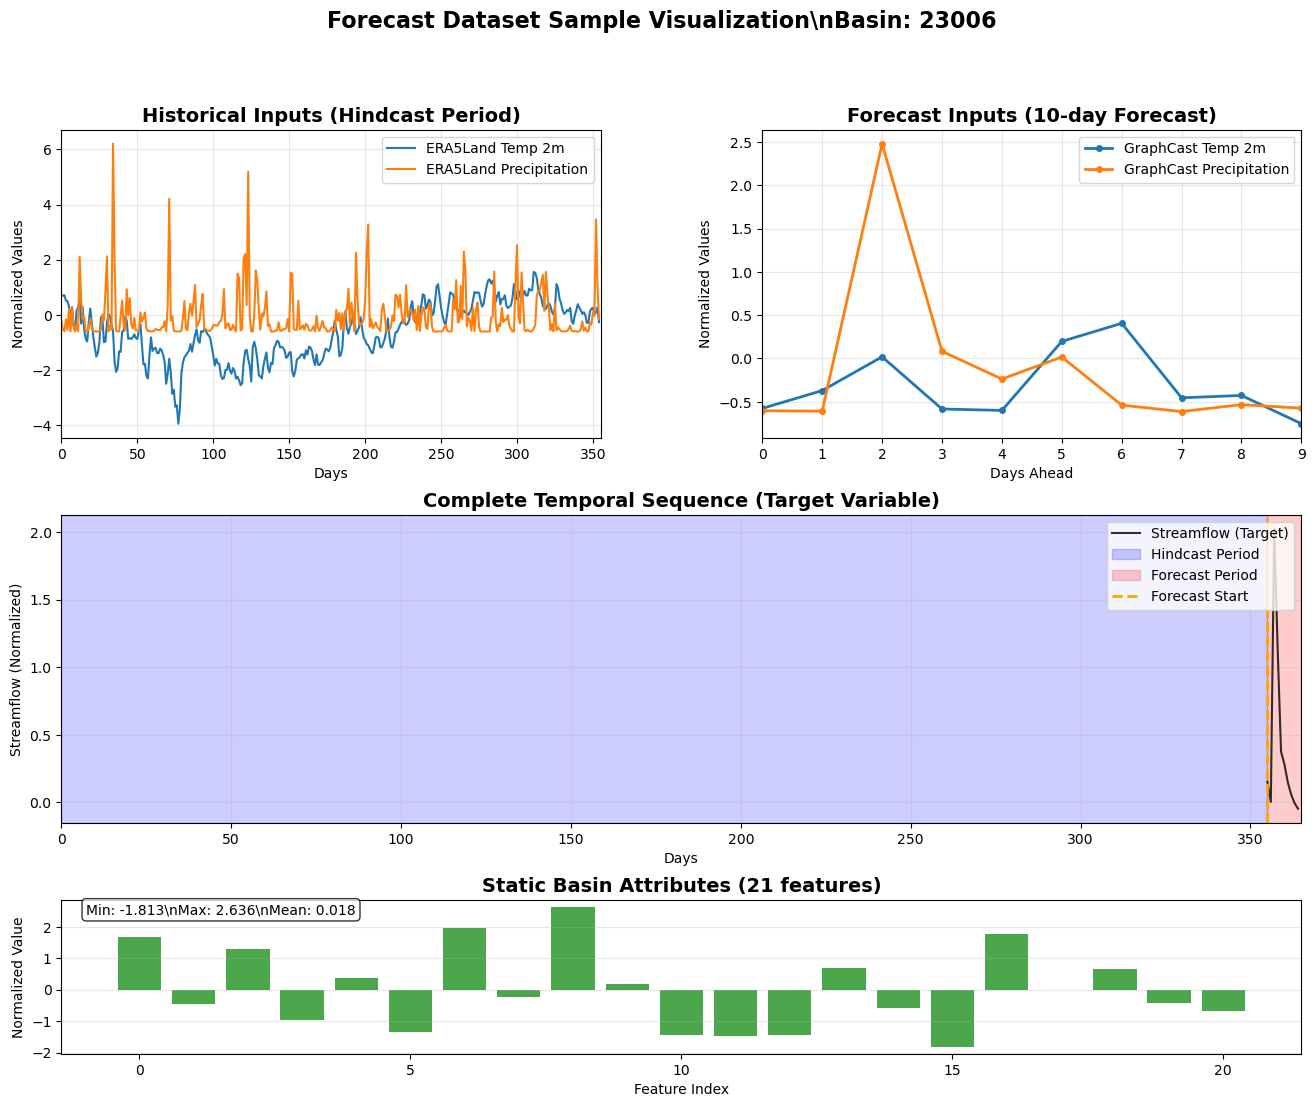


📈 Data Statistics:
  Historical inputs - Range: [-3.957, 6.209], Mean: -0.336
  Forecast inputs - Range: [-0.754, 2.479], Mean: -0.214
  Targets - Range: [nan, nan], Mean: nan
  Static features - Range: [-1.813, 2.636], Mean: 0.018


In [10]:
# Get a sample and create comprehensive visualization
sample_idx = 0
sample = dataset[sample_idx]

# Extract data from the sample
x_h = sample['x_h'].numpy()  # Historical inputs
x_f = sample['x_f'].numpy()  # Forecast inputs  
y = sample['y'].numpy()      # Targets
dates = sample['date']       # Dates
x_s = sample['x_s'].numpy()  # Static features

print(f"📊 Sample {sample_idx} Details:")
print(f"  Historical inputs (x_h): {x_h.shape}")
print(f"  Forecast inputs (x_f): {x_f.shape}")
print(f"  Targets (y): {y.shape}")
print(f"  Dates: {dates.shape}")
print(f"  Static features (x_s): {x_s.shape}")

# Create a comprehensive visualization
fig = plt.figure(figsize=(16, 12))

# Define the time structure
hindcast_steps = x_h.shape[0]  # 355 steps
forecast_steps = x_f.shape[0]  # 10 steps
total_steps = y.shape[0]       # 365 steps

# Timeline: hindcast + forecast period
hindcast_dates = dates[:hindcast_steps]
target_dates = dates[hindcast_steps:]  # Last 10 days for targets

print(f"\n⏰ Temporal Structure:")
print(f"  Hindcast period: {hindcast_steps} days ({dates[0]} to {dates[hindcast_steps-1]})")
print(f"  Forecast period: {forecast_steps} days ({dates[hindcast_steps]} to {dates[-1]})")
print(f"  Total sequence: {total_steps} days")

# Create subplots
gs = fig.add_gridspec(3, 2, height_ratios=[2, 2, 1], hspace=0.3, wspace=0.3)

# 1. Historical Inputs (Hindcast)
ax1 = fig.add_subplot(gs[0, 0])
hindcast_feature_names = ['ERA5Land Temp 2m', 'ERA5Land Precipitation']
for i in range(x_h.shape[1]):
    ax1.plot(range(hindcast_steps), x_h[:, i], label=hindcast_feature_names[i], linewidth=1.5)
ax1.set_title('Historical Inputs (Hindcast Period)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Days')
ax1.set_ylabel('Normalized Values')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, hindcast_steps)

# 2. Forecast Inputs
ax2 = fig.add_subplot(gs[0, 1])
forecast_feature_names = ['GraphCast Temp 2m', 'GraphCast Precipitation']
for i in range(x_f.shape[1]):
    ax2.plot(range(forecast_steps), x_f[:, i], 'o-', label=forecast_feature_names[i], linewidth=2, markersize=4)
ax2.set_title('Forecast Inputs (10-day Forecast)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Days Ahead')
ax2.set_ylabel('Normalized Values')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, forecast_steps-1)

# 3. Combined Timeline View
ax3 = fig.add_subplot(gs[1, :])
# Plot targets for the entire sequence
ax3.plot(range(total_steps), y[:, 0], 'k-', label='Streamflow (Target)', linewidth=1.5, alpha=0.8)

# Highlight different periods
ax3.axvspan(0, hindcast_steps, alpha=0.2, color='blue', label='Hindcast Period')
ax3.axvspan(hindcast_steps, total_steps, alpha=0.2, color='red', label='Forecast Period')

# Add vertical line to separate periods
ax3.axvline(x=hindcast_steps, color='orange', linestyle='--', linewidth=2, label='Forecast Start')

ax3.set_title('Complete Temporal Sequence (Target Variable)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Days')
ax3.set_ylabel('Streamflow (Normalized)')
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, total_steps)

# 4. Static Features Bar Plot
ax4 = fig.add_subplot(gs[2, :])
static_indices = range(len(x_s))
bars = ax4.bar(static_indices, x_s, alpha=0.7, color='green')
ax4.set_title(f'Static Basin Attributes ({len(x_s)} features)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Feature Index')
ax4.set_ylabel('Normalized Value')
ax4.grid(True, alpha=0.3, axis='y')

# Add some statistics
ax4.text(0.02, 0.98, f'Min: {x_s.min():.3f}\\nMax: {x_s.max():.3f}\\nMean: {x_s.mean():.3f}', 
         transform=ax4.transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle(f'Forecast Dataset Sample Visualization\\nBasin: {dataset.basins[sample_idx//len(dataset)*len(dataset.basins)]}', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n📈 Data Statistics:")
print(f"  Historical inputs - Range: [{x_h.min():.3f}, {x_h.max():.3f}], Mean: {x_h.mean():.3f}")
print(f"  Forecast inputs - Range: [{x_f.min():.3f}, {x_f.max():.3f}], Mean: {x_f.mean():.3f}") 
print(f"  Targets - Range: [{y.min():.3f}, {y.max():.3f}], Mean: {y.mean():.3f}")
print(f"  Static features - Range: [{x_s.min():.3f}, {x_s.max():.3f}], Mean: {x_s.mean():.3f}")